# MNIST database (Modified National Institute of Standards and Technology database)

 a large database of handwritten digits that is commonly used for training various image processing systems

# fashion mnist image

## import library 

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## import data & Split : Train/test 

In [22]:
from keras.datasets import fashion_mnist
(x_train,y_train), (x_test,y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 5s 1us/step


In [23]:
#savoir les dimensionsdes données apprentissages et test
print('Training data shape : ', x_train.shape, y_train.shape)
print('Testing data shape : ', x_test.shape, y_test.shape)


Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


##   the different categories in the database

In [24]:
# savoir les différentes catégories
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : 9')

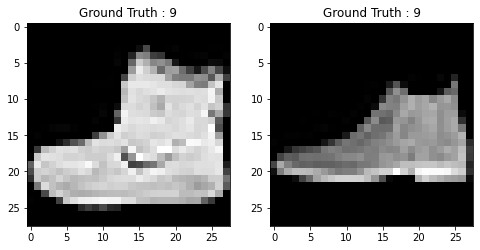

In [26]:
from matplotlib import pyplot as plt
plt.figure(figsize=[8,8])

# Display the first image in training data
plt.subplot(121)
plt.imshow(x_train[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(y_train[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(x_test[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(y_test[0]))

In [27]:
x_tr = x_train.reshape(-1, 28,28, 1)
x_te = x_test.reshape(-1, 28,28, 1)
x_tr.shape, x_te.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [28]:
x_tr = x_tr.astype('float32')
x_te = x_te.astype('float32')
x_tr = x_tr / 255.
x_te = x_te / 255.

In [29]:
# Change the labels from categorical to code numÃ©riques comme bit
from keras.utils import np_utils
y_tr_b = np_utils.to_categorical(y_train)
y_te_b = np_utils.to_categorical(y_test)

#on va afficher avant et aprÃ¨s transformation
print('Original label:', y_train[0])
print('After conversation:', y_tr_b[0])

Original label: 9
After conversation: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [30]:
#construction du modÃ¨le cnn avec keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from tensorflow.keras.optimizers import SGD

batch_size = 64
epochs = 20
num_classes = 10

fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(Dense(num_classes, activation='softmax'))

#compiler le modÃ¨le
fashion_model.compile(loss='categorical_crossentropy', optimizer=SGD(0.001),metrics=['accuracy'])


In [54]:
from PIL import Image
k1=np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
#filtre moyen
k2=np.array([[1/9,1/9,1/9],[1/9,1/9,1/9],[1/9,1/9,1/9]])

#filtre sobel
k3=np.array([[-1,0,1],[-2,0,2],[-1,0,1]])

import os
image=Image.open(os.path.join('mm.jpg'))
im= image.convert('L').resize((150,150),Image.ANTIALIAS)
imageArray=np.array(im,'uint8')

print (imageArray.shape)




(150, 150)


<ipython-input-54-380d7ff11dd7>:11: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  im= image.convert('L').resize((150,150),Image.ANTIALIAS)


In [55]:
from scipy import signal
imageConv1 = signal.convolve2d(imageArray,k1, boundary='symm',mode='same')
imageConv2 = signal.convolve2d(imageArray,k2, boundary='symm',mode='same')
imageConv3 = signal.convolve2d(imageArray,k3, boundary='symm',mode='same')

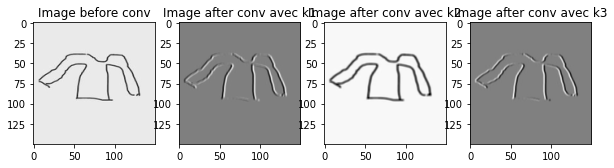

In [57]:
plt.figure(figsize=[10,10])



#display the firts image in training data
plt.subplot(141)
plt.imshow(imageArray,cmap='gray')
plt.title("Image before conv")


# display the first image in testing data 1
plt.subplot(142)
plt.imshow(imageConv1,cmap='gray')
plt.title("Image after conv avec k1")



# display the first image in testing data 2
plt.subplot(143)
plt.imshow(imageConv2,cmap='gray')
plt.title("Image after conv avec k2")



# display the first image in testing data 3
plt.subplot(144)
plt.imshow(imageConv3,cmap='gray')
plt.title("Image after conv avec k3")

plt.show()


In [58]:
#training du modÃ¨le
fashion_train = fashion_model.fit(x_tr,y_tr_b, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_te, y_te_b))


Epoch 1/20
938/938 [==============================] - 22s 23ms/step - loss: 2.2662 - accuracy: 0.2051 - val_loss: 2.2166 - val_accuracy: 0.2703
Epoch 2/20
938/938 [==============================] - 23s 25ms/step - loss: 2.0208 - accuracy: 0.3925 - val_loss: 1.6129 - val_accuracy: 0.5810
Epoch 3/20
938/938 [==============================] - 23s 25ms/step - loss: 1.1256 - accuracy: 0.6469 - val_loss: 0.8937 - val_accuracy: 0.6812
Epoch 4/20
938/938 [==============================] - 23s 25ms/step - loss: 0.8174 - accuracy: 0.7093 - val_loss: 0.7931 - val_accuracy: 0.7104
Epoch 5/20
938/938 [==============================] - 23s 25ms/step - loss: 0.7398 - accuracy: 0.7372 - val_loss: 0.7477 - val_accuracy: 0.7189
Epoch 6/20
938/938 [==============================] - 23s 25ms/step - loss: 0.6924 - accuracy: 0.7517 - val_loss: 0.7159 - val_accuracy: 0.7260
Epoch 7/20
938/938 [==============================] - 23s 25ms/step - loss: 0.6622 - accuracy: 0.7592 - val_loss: 0.7002 - val_accuracy:

In [59]:
#Ã©valuation du modÃ¨le
eval = fashion_model.evaluate(x_te, y_te_b, verbose=1)
print('Test loss:', eval[0])
print('Test accuracy:', eval[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.5123 - accuracy: 0.8144
Test loss: 0.5122905969619751
Test accuracy: 0.8144000172615051


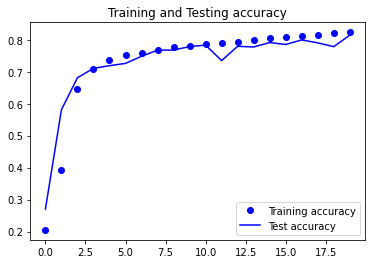

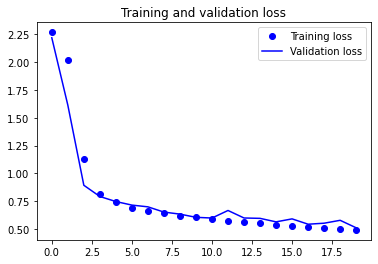

In [60]:
#wshÃ©matisation des courbes pour teste le sous et sur apprentissages
accuracy = fashion_train.history['accuracy']
val_accuracy = fashion_train.history['val_accuracy']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Test accuracy')
plt.title('Training and Testing accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [64]:
#sauvegarder le modÃ¨le sous un fichier json file
from keras.models import model_from_json
model= fashion_model.to_json()
with open("model_tr.json", "w") as json_file:
     json_file.write (model)
     
     
     
# serialize weights to HDF5
fashion_model.save_weights("model_weights.h5")
print("Saved model to disk") 

Saved model to disk


In [2]:
from tensorflow.keras.models import model_from_json
model = model_from_json(open("model_tr.json", "r").read())
model.load_weights('model_weights.h5')